# Import Libraries and Setup
Import required libraries such as pandas, numpy, matplotlib, and seaborn. Set up notebook configurations.

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Set up notebook configurations
%matplotlib inline
sns.set_theme(style="whitegrid")

# Display settings for pandas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


# Data Ingestion: Read Data
Load the dataset using pandas. Read from CSV or other file formats.

In [6]:
# Data Ingestion: Read Data

# Load the dataset using pandas
file_path = 'enrollments_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
display(data.head())
display(data.shape)

,Timestamp,Parent name,Child Name,Age,Communication Preference,Teacher Name,Source,Source details,Class ID,Type,Class name,Date,Day,Start time (in PST),End time (in PST),Want another slot,Country,Region,City,Timezone,Phase Mapping,Topics,Attended?,Concepts,Interesting,Another class,Score - Concept,Score - Interesting,Score - Another class,Yes,Maybe,No,Final score,ID for sequential classes,Class Part Number,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,NaN,Raphaela,Elsa,9.0,NaN,Clark Vandeventer,Friends and Family,NaN,7,Onetime,Travel the World with Mr. Clark : England,6 November,Monday,2:00 PM,3:00 PM,NaN,NaN,NaN,NaN,PST,Phase 1,Life skills,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,NaN,Raphaela,Elsa,9.0,NaN,Nicole Pauling,Friends and Family,NaN,14,Onetime,Forgotten History: Mysteries and Extraordinary...,13 November,Monday,5:00 PM,6:00 PM,NaN,NaN,NaN,NaN,PST,Phase 1,History,Yes,Yes,Yes,Yes,3.0,3.0,3.0,3.0,0.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN
2,NaN,Swetha,Vivaan,7.0,NaN,Bill Thompson,Friends and Family,NaN,18,Onetime,Public Speaking & Debate - Level 1,15 November,Wednesday,6:00 PM,7:00 PM,NaN,NaN,NaN,NaN,EST,Phase 1,Speaking,Unenrolled,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,NaN,Swetha,Vivaan,7.0,NaN,Clark Vandeventer,Friends and Family,NaN,19,Onetime,Travel the World with Mr. Clark : India,14 November,Tuesday,3:00 PM,4:00 PM,NaN,NaN,NaN,NaN,EST,Phase 1,Life skills,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,NaN,Raphaela,Ana,13.0,NaN,Clark Vandeventer,Friends and Family,NaN,11,Onetime,How is the President of the United States elec...,9 November,Thursday,2:00 PM,3:00 PM,NaN,NaN,NaN,NaN,PST,Phase 1,Life skills,Yes,Yes,Yes,Maybe,3.0,3.0,2.0,2.0,1.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN


(6509, 38)

# Data Cleaning and Preprocessing
Perform data cleaning by handling missing values, correcting data types, and formatting the data for analysis.

In [7]:
# Data Cleaning and Preprocessing

# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Handle missing values
# For simplicity, let's fill missing values with the mean for numerical columns and mode for categorical columns
for column in data.columns:
    if data[column].dtype == np.number:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

# Verify that there are no more missing values
missing_values_after = data.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

# Correct data types if necessary
# Example: Convert a column to datetime
# data['date_column'] = pd.to_datetime(data['date_column'])

# Display data types to verify
print("Data types after correction:\n", data.dtypes)

# Format the data for analysis
# Example: Create new columns or drop unnecessary columns
# data['new_column'] = data['existing_column1'] + data['existing_column2']
# data.drop(columns=['unnecessary_column'], inplace=True)

# Display the first few rows of the cleaned dataset
data.sample(10)

Missing values in each column:
 Timestamp                    2117
Parent name                  1692
Child Name                   1692
Age                          1695
Communication Preference     3260
Teacher Name                 1725
Source                       1702
Source details               2759
Class ID                     1726
Type                         1726
Class name                   1726
Date                         1727
Day                          1726
Start time (in PST)          1726
End time (in PST)            1726
Want another slot            6315
Country                      2464
Region                       2551
City                         2317
Timezone                     1842
Phase Mapping                1748
Topics                       1993
Attended?                    1860
Concepts                     5020
Interesting                  5017
Another class                5019
Score - Concept              1927
Score - Interesting          1927
Score - Another 

,Timestamp,Parent name,Child Name,Age,Communication Preference,Teacher Name,Source,Source details,Class ID,Type,Class name,Date,Day,Start time (in PST),End time (in PST),Want another slot,Country,Region,City,Timezone,Phase Mapping,Topics,Attended?,Concepts,Interesting,Another class,Score - Concept,Score - Interesting,Score - Another class,Yes,Maybe,No,Final score,ID for sequential classes,Class Part Number,Unnamed: 35,Unnamed: 36,Unnamed: 37
4437,12 Oct 2024 8:20,Tiffany,Jamar,1.000000e+01,Email,Cara Bailey,Facebook,Indiana homeschool moms,271_2,Ongoing,Draw It: Halloween Cat,October 25,Wednesday,4:00 PM,5:00 PM,Want another slot:,US,Indiana,Indiana,EST,Phase 9_2,Art,No,Yes,Yes,Yes,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,271.000000,2.00000,NaN,True,124.0
2195,30 Mar 2024 23:10,Rabiya,Zahra,1.100000e+01,"Email,Text",Lianne Brunt,Other,Mail,179_3,Course,Financial Literacy 101 (Grade 7 - Grade 9),3 April,Wednesday,4:00 PM,5:00 PM,Want another slot:,IN,West Bengal,Kolkata,IST,Phase 5,Financial Literacy,Duplicate entry,Yes,Yes,Yes,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,179.000000,3.00000,NaN,True,124.0
5723,27 Jan 2024 9:54,Ihuaku,Adewole,7.369323e+07,Email,Aaron Potsick,Facebook,Homeschool,273_1,Onetime,An introduction to Chess!,August 26,Monday,4:00 PM,5:00 PM,Want another slot:,US,Alberta,Calgary,EST,Phase 6,Life skills,No,Yes,Yes,Yes,0.611742,0.609777,0.592665,0.0,0.0,0.0,0.0,210.598466,1.69989,NaN,True,124.0
5755,27 Jan 2024 9:54,Ihuaku,Adewole,7.369323e+07,Email,Aaron Potsick,Facebook,Homeschool,273_1,Onetime,An introduction to Chess!,August 26,Monday,4:00 PM,5:00 PM,Want another slot:,US,Alberta,Calgary,EST,Phase 6,Life skills,No,Yes,Yes,Yes,0.611742,0.609777,0.592665,0.0,0.0,0.0,0.0,210.598466,1.69989,NaN,True,124.0
1128,10 Feb 2024 15:10,Tiffany,London,1.100000e+01,Email,Aaron Potsick,Facebook,Free Homeschooling resources,128_2,Course,Logic Detective: How to Spot Bad Arguments and...,5 March,Tuesday,5:00 PM,6:00 PM,Want another slot:,US,Florida,Cape Coral,EST,Phase 4,Logic,Yes,Yes,Maybe,No,3.000000,2.000000,1.000000,1.0,1.0,1.0,6.0,128.000000,2.00000,NaN,True,124.0
2524,18 Apr 2024 18:16,Leandra,Aubrey,7.000000e+00,Email,Kristen Vale da Serra,Facebook,Homeschool,191_2,Playlist-2,Science Explorer Club,May 22,Wednesday,3:00 PM,4:00 PM,Want another slot:,CA,Ontario,Stoney Point,EST,Phase 6,Science,No,Yes,Yes,Yes,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,191.000000,2.00000,NaN,True,124.0
5476,27 Jan 2024 9:54,Ihuaku,Adewole,7.369323e+07,Email,Aaron Potsick,Facebook,Homeschool,273_1,Onetime,An introduction to Chess!,August 26,Monday,4:00 PM,5:00 PM,Want another slot:,US,Alberta,Calgary,EST,Phase 6,Life skills,No,Yes,Yes,Yes,0.611742,0.609777,0.592665,0.0,0.0,0.0,0.0,210.598466,1.69989,NaN,True,124.0
3838,6 August 2024 23:05,Ihuaku,Adewole,1.000000e+01,"Email,Text",Amalia Fernand,Facebook,Homeschooling,246_1,Onetime,Crazy About Crystals: Mineral Testing,August 15,Thursday,3:00 PM,4:00 PM,Want another slot:,CA,Alberta,Alberta,MST,Phase 9,Science,No,Yes,Yes,Yes,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,246.000000,1.00000,NaN,True,124.0
699,27 Jan 2024 9:54,Anna,Alicja,9.000000e+00,Email,Bill Thompson,Facebook,Free Homeschooling Resourses,30,Onetime,Guided Impromptu Speaking,06 December,Wednesday,4:00 PM,5:00 PM,Want another slot:,US,Alberta,US,EST,Phase 2,Speaking,No,Yes,Yes,Yes,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,210.598466,1.69989,NaN,True,124.0
5771,27 Jan 2024 9:54,Ihuaku,Adewole,7.369323e+07,Email,Aaron Potsick,Facebook,Homeschool,273_1,Onetime,An introduction to Chess!,August 26,Monday,4:00 PM,5:00 PM,Want another slot:,US,Alberta,Calgary,EST,Phase 6,Life skills,No,Yes,Yes,Yes,0.611742,0.609777,0.592665,0.0,0.0,0.0,0.0,210.598466,1.69989,NaN,True,124.0


# Exploratory Data Analysis
Generate summary statistics and perform initial analyses to understand trends and distributions in the data.

Summary Statistics:


,Age,Score - Concept,Score - Interesting,Score - Another class,Yes,Maybe,No,Final score,ID for sequential classes,Class Part Number,Unnamed: 35,Unnamed: 37
count,6.509000e+03,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,0.0,6509.0
mean,7.369323e+07,0.611742,0.609777,0.592665,0.389036,0.053114,0.016152,1.291084,210.598466,1.699890,NaN,124.0
std,4.397084e+09,0.994784,0.992619,0.973205,0.965959,0.301562,0.170108,3.048736,45.431100,0.727118,NaN,0.0
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.000000,1.000000,NaN,124.0
25%,9.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,201.000000,1.000000,NaN,124.0
50%,1.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,210.598466,1.699890,NaN,124.0
75%,7.369323e+07,0.611742,0.609777,0.592665,0.000000,0.000000,0.000000,0.000000,214.000000,1.699890,NaN,124.0
max,3.547592e+11,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,9.000000,422.000000,5.000000,NaN,124.0


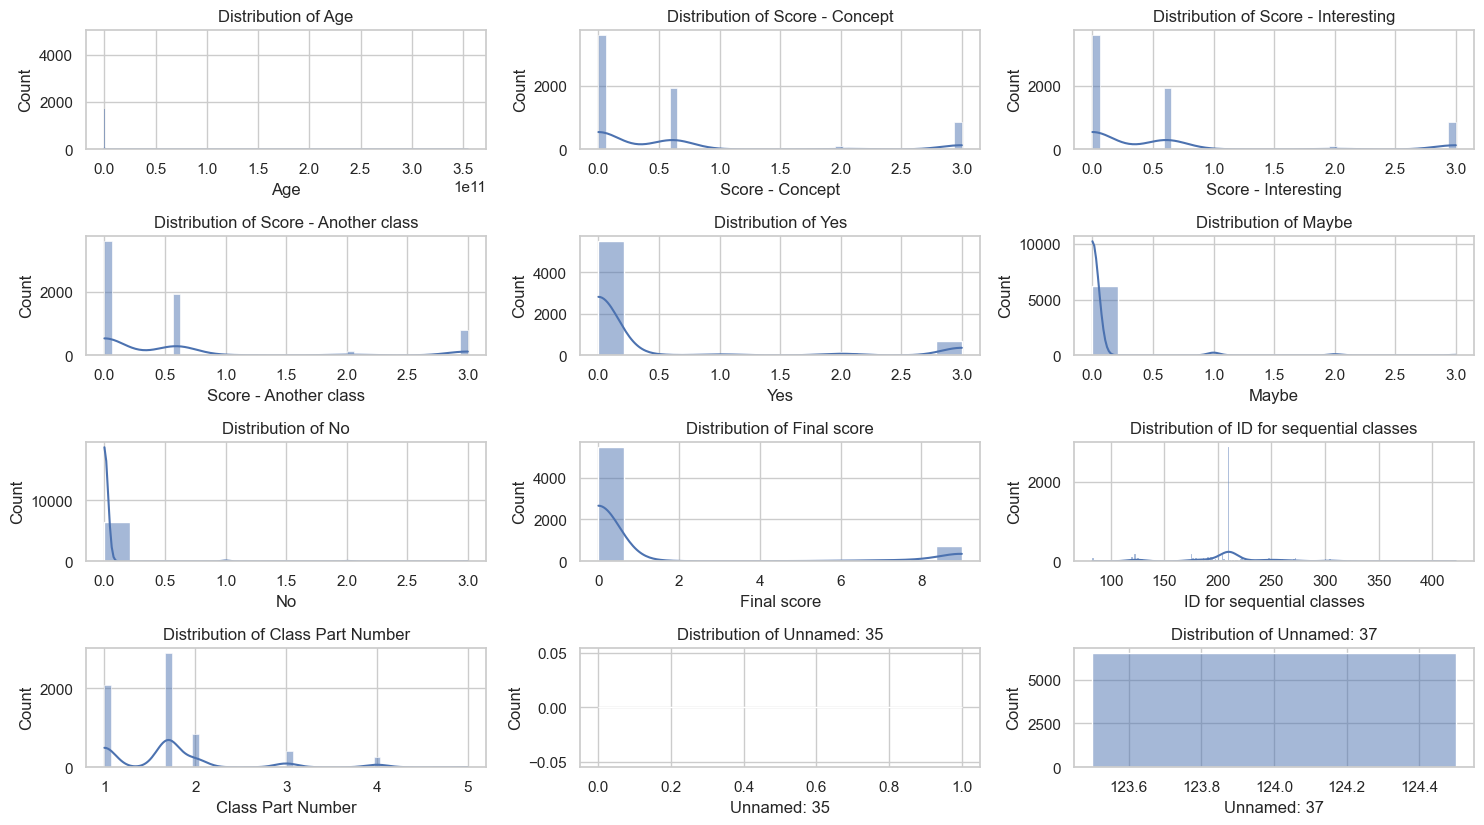

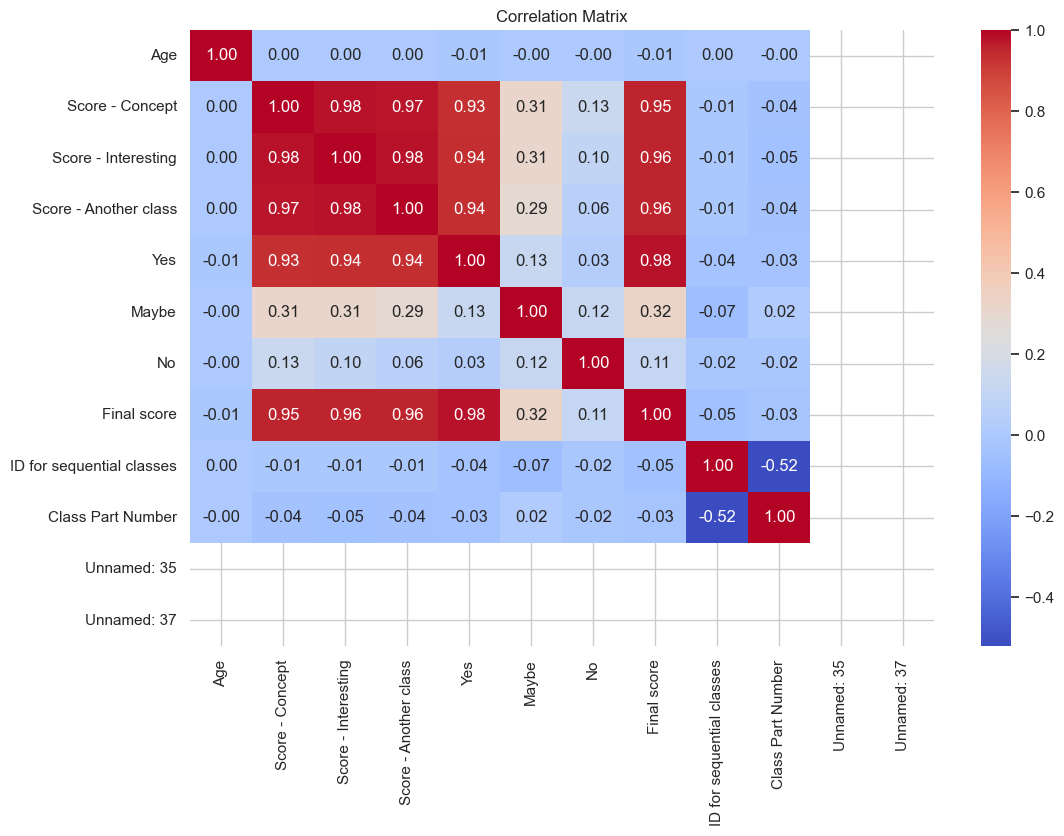

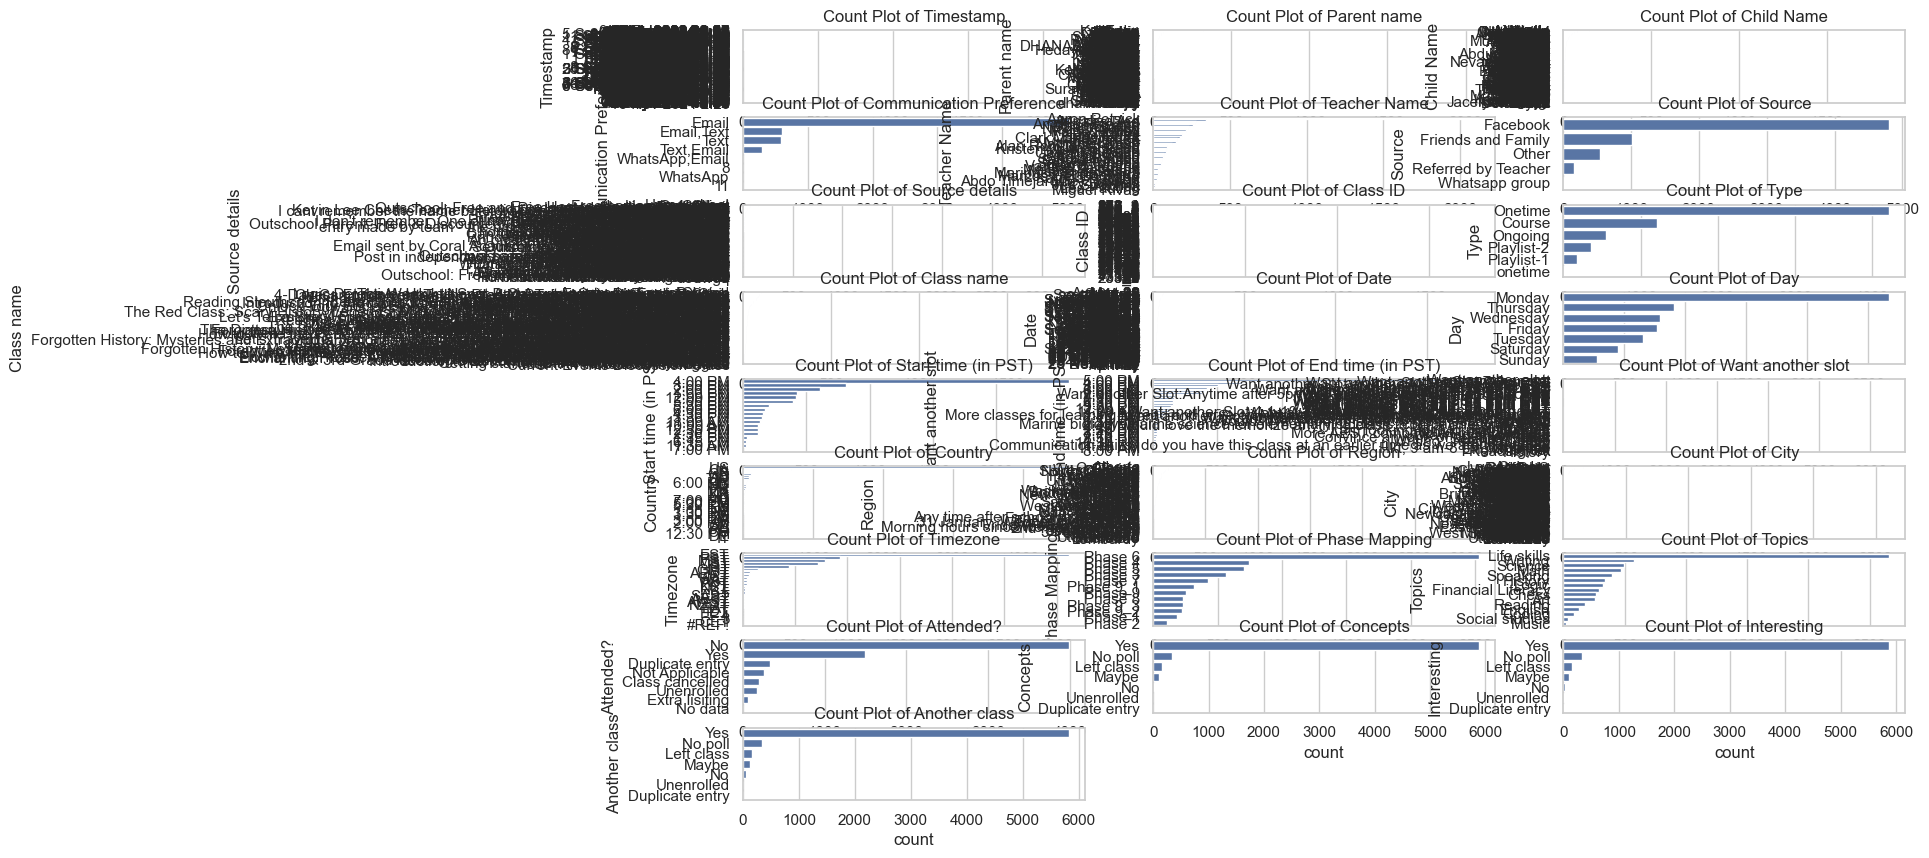

Highly Correlated Features (correlation > 0.8):


,Age,Score - Concept,Score - Interesting,Score - Another class,Yes,Maybe,No,Final score,ID for sequential classes,Class Part Number,Unnamed: 35,Unnamed: 37
Age,1.000000e+00,0.000003,0.000003,0.000003,-0.006678,-0.002924,-0.001576,-0.007022,1.588861e-07,-0.000005,NaN,NaN
Score - Concept,3.015283e-06,1.000000,0.977362,0.972535,0.930659,0.312369,0.133841,0.954844,-6.584545e-03,-0.039914,NaN,NaN
Score - Interesting,3.037145e-06,0.977362,1.000000,0.979481,0.936363,0.306722,0.096099,0.957045,-5.411968e-03,-0.045182,NaN,NaN
Score - Another class,3.233573e-06,0.972535,0.979481,1.000000,0.940506,0.288157,0.061614,0.955412,-5.365971e-03,-0.039915,NaN,NaN
Yes,-6.677536e-03,0.930659,0.936363,0.940506,1.000000,0.125517,0.033235,0.977098,-3.603493e-02,-0.034588,NaN,NaN
Maybe,-2.923726e-03,0.312369,0.306722,0.288157,0.125517,1.000000,0.118246,0.323685,-6.508604e-02,0.019289,NaN,NaN
No,-1.576143e-03,0.133841,0.096099,0.061614,0.033235,0.118246,1.000000,0.110754,-2.002066e-02,-0.015766,NaN,NaN
Final score,-7.022154e-03,0.954844,0.957045,0.955412,0.977098,0.323685,0.110754,1.000000,-4.837069e-02,-0.029860,NaN,NaN
ID for sequential classes,1.588861e-07,-0.006585,-0.005412,-0.005366,-0.036035,-0.065086,-0.020021,-0.048371,1.000000e+00,-0.520243,NaN,NaN
Class Part Number,-4.957553e-06,-0.039914,-0.045182,-0.039915,-0.034588,0.019289,-0.015766,-0.029860,-5.202427e-01,1.000000,NaN,NaN


Recommendations:


['Consider removing one of the features: Score - Concept or Score - Interesting',
 'Consider removing one of the features: Score - Concept or Score - Another class',
 'Consider removing one of the features: Score - Concept or Yes',
 'Consider removing one of the features: Score - Concept or Final score',
 'Consider removing one of the features: Score - Interesting or Score - Concept',
 'Consider removing one of the features: Score - Interesting or Score - Another class',
 'Consider removing one of the features: Score - Interesting or Yes',
 'Consider removing one of the features: Score - Interesting or Final score',
 'Consider removing one of the features: Score - Another class or Score - Concept',
 'Consider removing one of the features: Score - Another class or Score - Interesting',
 'Consider removing one of the features: Score - Another class or Yes',
 'Consider removing one of the features: Score - Another class or Final score',
 'Consider removing one of the features: Yes or Scor

In [11]:
# Exploratory Data Analysis

# Generate summary statistics
summary_statistics = data.describe()
print("Summary Statistics:")
display(summary_statistics)

# Plotting distributions of numerical features
numerical_columns = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

# Plotting correlations between numerical features
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Analyzing categorical features
categorical_columns = data.select_dtypes(include=["object"]).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns) // 3 + 1, 3, i)
    sns.countplot(y=data[column], order=data[column].value_counts().index)
    plt.title(f"Count Plot of {column}")
plt.tight_layout()
plt.show()

# Insights and Recommendations
# Example: Identify highly correlated features
highly_correlated_features = (
    correlation_matrix[correlation_matrix > 0.8].stack().index.tolist()
)
print("Highly Correlated Features (correlation > 0.8):")
display(correlation_matrix)

# Example: Recommendations based on insights
# If there are highly correlated features, consider removing one to reduce multicollinearity
recommendations = []
for feature_pair in highly_correlated_features:
    if feature_pair[0] != feature_pair[1]:
        recommendations.append(
            f"Consider removing one of the features: {feature_pair[0]} or {feature_pair[1]}"
        )

print("Recommendations:")
display(recommendations)

# Data Visualization: Charts and Graphs
Create visualizations like line charts, bar charts, scatter plots, and histograms using matplotlib and seaborn to illustrate data trends.

In [ ]:
# Data Visualization: Charts and Graphs

# Line Chart: Trend over time for a numerical feature
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date_column', y='numerical_feature')
plt.title('Trend of Numerical Feature Over Time')
plt.xlabel('Date')
plt.ylabel('Numerical Feature')
plt.xticks(rotation=45)
plt.show()

# Bar Chart: Comparison of categorical feature counts
plt.figure(figsize=(12, 6))
sns.barplot(x=data['categorical_feature'].value_counts().index, y=data['categorical_feature'].value_counts().values)
plt.title('Bar Chart of Categorical Feature')
plt.xlabel('Categorical Feature')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Scatter Plot: Relationship between two numerical features
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='numerical_feature1', y='numerical_feature2', hue='categorical_feature')
plt.title('Scatter Plot of Numerical Feature1 vs Numerical Feature2')
plt.xlabel('Numerical Feature1')
plt.ylabel('Numerical Feature2')
plt.legend(title='Categorical Feature')
plt.show()

# Histogram: Distribution of a numerical feature
plt.figure(figsize=(12, 6))
sns.histplot(data['numerical_feature'], kde=True, bins=30)
plt.title('Histogram of Numerical Feature')
plt.xlabel('Numerical Feature')
plt.ylabel('Frequency')
plt.show()

# Generating Insights and Recommendations
Interpret the results from the analyses and visualizations to derive actionable insights and provide recommendations.

In [ ]:
# Generating Insights and Recommendations

# Insights from Summary Statistics
mean_values = summary_statistics.loc['mean']
print("Mean values of numerical features:\n", mean_values)

# Insights from Distribution Plots
# Example: Identify skewed distributions
skewed_features = []
for column in numerical_columns:
    skewness = data[column].skew()
    if abs(skewness) > 1:
        skewed_features.append(column)
print("Skewed Features (|skewness| > 1):\n", skewed_features)

# Insights from Correlation Matrix
# Example: Identify strong positive and negative correlations
strong_positive_correlations = correlation_matrix[correlation_matrix > 0.8].stack().index.tolist()
strong_negative_correlations = correlation_matrix[correlation_matrix < -0.8].stack().index.tolist()
print("Strong Positive Correlations (correlation > 0.8):\n", strong_positive_correlations)
print("Strong Negative Correlations (correlation < -0.8):\n", strong_negative_correlations)

# Recommendations based on Insights
recommendations = []

# Recommendation for skewed features
for feature in skewed_features:
    recommendations.append(f"Consider applying a transformation (e.g., log, square root) to reduce skewness in {feature}")

# Recommendation for highly correlated features
for feature_pair in highly_correlated_features:
    if feature_pair[0] != feature_pair[1]:
        recommendations.append(f"Consider removing one of the features: {feature_pair[0]} or {feature_pair[1]} to reduce multicollinearity")

# Recommendation for strong correlations
for feature_pair in strong_positive_correlations:
    if feature_pair[0] != feature_pair[1]:
        recommendations.append(f"Strong positive correlation between {feature_pair[0]} and {feature_pair[1]}: Investigate further")
for feature_pair in strong_negative_correlations:
    if feature_pair[0] != feature_pair[1]:
        recommendations.append(f"Strong negative correlation between {feature_pair[0]} and {feature_pair[1]}: Investigate further")

print("Recommendations:\n", recommendations)

# Visualization of Insights
# Box Plot: Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i)
    sns.boxplot(data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

# Pair Plot: Relationships between numerical features
sns.pairplot(data[numerical_columns])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Heatmap: Highlighting strong correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=(abs(correlation_matrix) < 0.8))
plt.title('Heatmap of Strong Correlations')
plt.show()